## Guía 1 - Procesos Estocásticos

### Ejercicio 2

Sea $ X $ una VA tal que $ X \sim \mathcal{E}(\lambda) $

a) Genere $ N = 10⁴ $ muestras de X 

b) Calcule la media muestral y varianza muestral de $X$ y comparelas con las teóricas 

c) Construya el histograma de las muestras de $X$. Normalice el histograma para que tenga area 1 y compare la funcion obtenida con la funcion de densidad de probabilidad teorica.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
expon_random = np.random.exponential(1, 10**4)
print(expon_random)

[1.79280999 1.76562135 0.19354016 ... 2.66664522 1.04670134 1.39761989]


La media muestral y varianza muestral se estiman de manera tal que:

$$ {X}_n = \frac{1}{n} \sum_{i=1}^n X_i = \frac{X_1+X_2+...+X_n}{n} $$
$$ s_n^2 = \frac 1n \sum_{i=1}^n \left(y_i - \overline{y} \right)^ 2 = \left(\frac{1}{n} \sum_{i=1}^{n}y_i^2\right) - \overline{y}^2 $$

In [4]:
# Muestrales

media_muestral = np.mean(expon_random)
var_muestral = np.var(expon_random)

print("Muestrales")
print(media_muestral)
print(var_muestral)

# Teoricas
media_teorica = 1
var_teorica = 1

print("Teoricas")
print(media_teorica)
print(var_teorica)

Muestrales
0.9960026942701301
0.9695216499398474
Teoricas
1
1


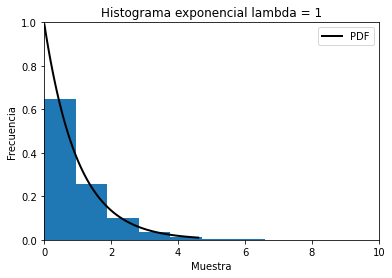

In [5]:
from scipy.stats import expon

x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
rv = expon()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='PDF')

plt.rcParams["figure.figsize"] = (12,8)
plt.hist(expon_random, density = True);
plt.xlabel("Muestra")
plt.ylabel("Frecuencia")
plt.title("Histograma exponencial lambda = 1")
plt.axis([0, 10, 0, 1]);
plt.legend()

plt.show();

### Ejercicio 3

2. Verifique por simulacion los resultados anteriores construyendo los histogramas de $X3$ y $X4$

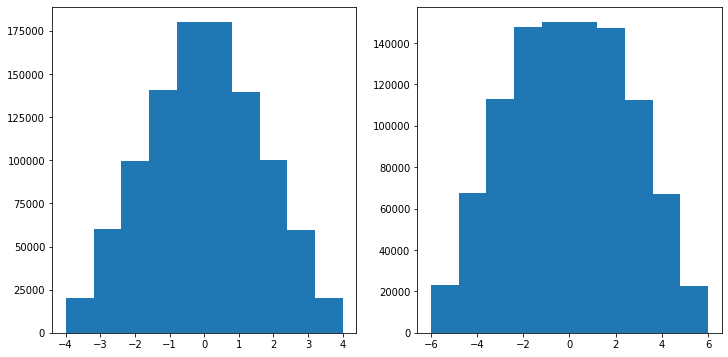

In [6]:
x1 = np.random.uniform(-2, 2, 1000000)
x2 = np.random.uniform(-2, 2, 1000000)
x3 = x1 + x2
x4 = 2*x1 + x2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.hist(x3)
ax2.hist(x4);

3. Repita el ejercicio para X1 ∼ U[−2, 2] y X2 ∼ U[−1, 1].

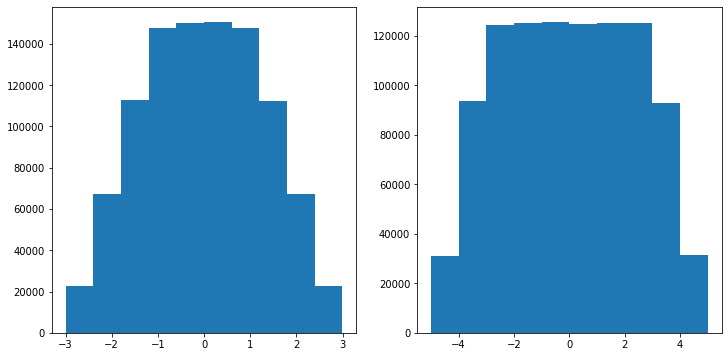

In [7]:
x1 = np.random.uniform(-2, 2, 1000000)
x2 = np.random.uniform(-1, 1, 1000000)
x3 = x1 + x2
x4 = 2*x1 + x2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.hist(x3)
ax2.hist(x4);

### Ejercicio 10
Obtenga $ N = 10^4 $ realizaciones del vector X. 

Estime la matriz de covarianza y compare el resultado con $ C_x $

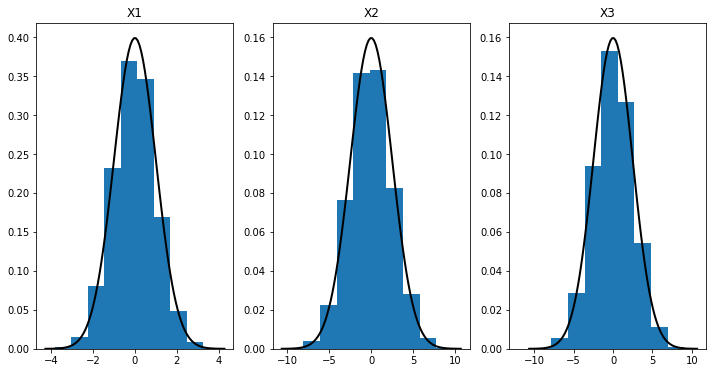

In [8]:
from scipy.stats import norm

N = 10**4
x1 = np.random.normal(0, 1, size = N)
x2 = np.random.normal(0, 5/2, size = N)
x3 = np.random.normal(0, 5/2, size = N)

x1_dens = np.linspace(norm.ppf(0.00001),
                norm.ppf(0.99999), 100)
x2_dens = np.linspace(norm.ppf(0.00001, loc=0, scale=5/2),
                     norm.ppf(0.99999, loc=0, scale=5/2), 100)

x3_dens = np.linspace(norm.ppf(0.00001, loc=0, scale=5/2),
                     norm.ppf(0.99999, loc=0, scale=5/2), 100)


X = [x1, x2, x3]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 6))

rv1 = norm(0,1)
ax1.set_title('X1')
ax1.hist(x1, density = True)
ax1.plot(x1_dens, rv1.pdf(x1_dens), 'k-', lw=2, label='PDF')

rv2 = norm(0,5/2)
ax2.set_title('X2')
ax2.hist(x2, density = True)
ax2.plot(x2_dens, rv2.pdf(x2_dens), 'k-', lw=2, label='PDF')

rv3 = norm(0,5/2)
ax3.set_title('X3')
ax3.hist(x3, density = True);
ax3.plot(x3_dens, rv3.pdf(x3_dens), 'k-', lw=2, label='PDF');

Dada una muestra de $n$ observaciones independientes $x$<sub>1</sub>,..., $x$<sub>$n$</sub> de un vector aleatorio $p$-dimensional un estimador de

$\operatorname{\Sigma} = \operatorname{E}\left[\left(X-\operatorname{E}[X]\right ) \left (X-\operatorname{E}[X]\right)^\mathrm{T}\right]$

es la matriz muestral de covarianzas

$\mathbf{Q} = {1 \over {n-1}}\sum_{i=1}^n (x_i-\overline{x})(x_i-\overline{x})^\mathrm{T}$


In [9]:
sample_X = np.array([x1, x2, x3])
C = np.array([[1, 0, 0],
             [0, 5/2, -1/2],
             [0, -1/2, 5/2]])

dif = np.cov(sample_X) - C
print(dif)

# Ver porque esto no funca np matmul de nx1 y 1x3
#F = np.array([x1, x2, x3]).T
#x1_mean = np.mean(x1)
#print(x1_mean)
#x2_mean = np.mean(x2)
#x3_mean = np.mean(x3)
#x_mean = np.array([x1_mean, x2_mean, x3_mean])
#ones = np.ones((N, 1))
#print(ones)
#print(x_mean)
#print(np.matmul(ones, x_mean))

#print(ones.dot(x_mean))
#Q = 1/(N-1) * np.transpose(F - ones.dot(x_mean)).dot(F - ones.dot(x_mean))

#Q

[[ 0.01663874 -0.02315687  0.01195484]
 [-0.02315687  3.99069462  0.47236057]
 [ 0.01195484  0.47236057  3.74532325]]


### Ejercicio 11.2

2. Grafique en el plano $(x, y)$ $N = 10^3$ realizaciones del vector $X$ junto con las curvas de
nivel anteriores.

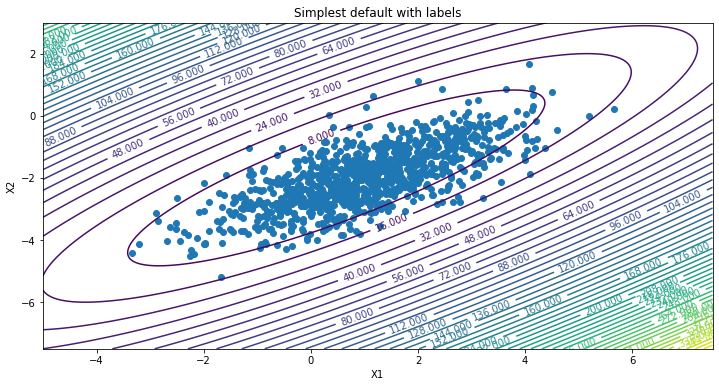

In [10]:
mean = np.array([1, -2])
cov = np.matrix([[2, 1], [1, 1]])
X = np.random.multivariate_normal(mean, cov, size = 10**3)

lambdas, P = np.linalg.eig(cov)
# Hay un lamda nega
x1 = X[:,0]
x2 = X[:,1]

delta = 0.0025
x = np.arange(-5, 7.5, delta)
y = np.arange(-7.5, 3, delta)

X1, X2 = np.meshgrid(x, y)

u1 = 1.17557*X1 - 0.557537
u2 = -0.726543*X1 + 1.17557*X2 + 2.69572
Z = (u1**2 / lambdas[0]) + (u2**2 / lambdas[1])

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax.set_title('Multivariate normal gaussian')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.scatter(x1, x2);

CS = ax.contour(X1, X2, Z, levels = 50)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels');

### Ejercicio 16

Genere $N$ muestras de $X$ utilizando diferentes valores del coeficiente de correlación $\rho = \{0, 0.5, 0.95, 0.5\}$

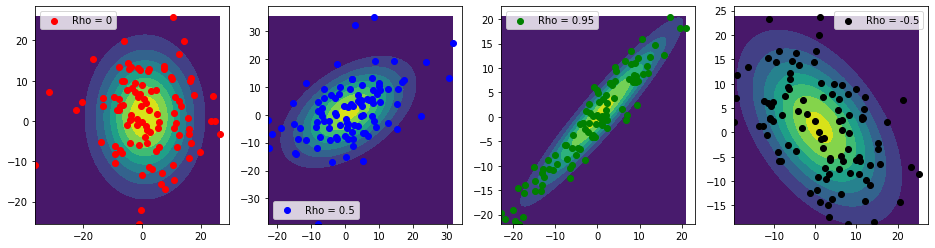

In [51]:
from scipy.stats import multivariate_normal

mu_1 = 1
mu_2 = 1
sigma_1 = 10
sigma_2 = 10
N = 100
rho = [0, 0.5, 0.95, -0.5]
X_rho = []
rvs = []
for r in rho:
    mean = np.array([mu_1, mu_2])
    cov = np.matrix([[sigma_1**2, r*sigma_1*sigma_2], [r*sigma_1*sigma_2, sigma_2**2]])
    X = np.random.multivariate_normal(mean, cov, size = N)
    rvs.append(multivariate_normal(mean, cov))
    X_rho.append(X)
    
delta = 0.025


fig, axes = plt.subplots(1, 4, figsize = (16, 4))
#ax.set_title('Multivariate normal gaussian')
#ax.set_xlabel('X1')
#ax.set_ylabel('X2')
colors = ['r', 'b', 'g', 'k']
for i in range(len(X_rho)):
    X = X_rho[i]
    ax = axes[i]
    rv = rvs[i]
    
    x = np.arange(min(X[:,0]), max(X[:,0]), delta)
    y = np.arange(min(X[:,1]), max(X[:,1]), delta)
    X1, X2 = np.meshgrid(x, y)
    pos = np.dstack((X1, X2))
    ax.contourf(X1, X2, rv.pdf(pos))
    ax.scatter(X[:,0], X[:,1], color = colors[i], label = 'Rho = ' + str(rho[i]))
    ax.legend();
    

